<a href="https://colab.research.google.com/github/AnandUgale/Capillary-ML-Hackathon/blob/master/CNN_model_Bulding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install tensorflow
!pip install tensorflow==2.0

In [2]:
# check tensorflow version
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
# copy File from Google drive
import shutil

In [4]:
shutil.copy('/content/drive/My Drive/DataFrame_Datasets.pickle', '/content/')

'/content/DataFrame_Datasets.pickle'

In [0]:
# Import Necessary Libraries
from six.moves import cPickle as pickle
import numpy as np
import random 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# open Pickled dataset
pfile = 'DataFrame_Datasets.pickle'
with (open(pfile, "rb")) as openfile:
    while True:
        try:
            temp = pickle.load(openfile)
        except EOFError:
            break

In [7]:
temp

{'test_datasets': array([[[ 0.046104 ,  0.0232164],
         [-0.0371335,  0.0811545],
         [-0.089496 ,  0.0953309],
         ...,
         [ 0.0012517,  0.0108891],
         [-0.02712  , -0.0275309],
         [-0.0098049, -0.0774564]],
 
        [[ 0.0029206, -0.1095073],
         [-0.0264942, -0.0786891],
         [-0.0988837, -0.0084236],
         ...,
         [ 0.1174505,  0.11526  ],
         [ 0.1101489,  0.1384764],
         [ 0.1049335,  0.12204  ]],
 
        [[ 0.1161988,  0.0501309],
         [ 0.1187022, -0.0302018],
         [ 0.0915822, -0.0491036],
         ...,
         [ 0.0300406,  0.0349273],
         [ 0.0959631,  0.0351327],
         [ 0.1128609,  0.0682109]],
 
        ...,
 
        [[-0.0032487, -0.1540909],
         [-0.0085278,  0.0178745],
         [ 0.       , -0.0577327],
         ...,
         [ 0.00934  ,  0.0735527],
         [ 0.0048731,  0.0275309],
         [ 0.2802006, -0.0408855]],
 
        [[ 0.1011159,  0.0583491],
         [-0.1628412, -0.

In [0]:
# Saved Dataset into train and test DataFrame
X_train = temp["train_datasets"]
y_train = temp["train_labels"]
X_test = temp["test_datasets"]
y_test = temp["test_labels"]

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((19800, 2048, 2), (19800,), (750, 2048, 2), (750,))

In [0]:
# Shuffle Train and Test Dataset
# define randomize function
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels

In [0]:
# Shuffle Dataset
X_train, y_train = randomize(X_train, y_train)
X_test, y_test = randomize(X_test, y_test)

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((19800, 2048, 2), (19800,), (750, 2048, 2), (750,))

In [0]:
# Import Packages to Build Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

In [0]:
# One-hot encoding on Labels
num_classes = 10
y_train_ohe = keras.utils.to_categorical(y_train, num_classes)
y_test_ohe = keras.utils.to_categorical(y_test, num_classes)

In [15]:
y_train_ohe.shape, y_test_ohe.shape

((19800, 10), (750, 10))

In [0]:
# Split Train dataset into train and validation
(X_train, X_valid) = X_train[2000:], X_train[:2000]
(y_train, y_valid) = y_train_ohe[2000:], y_train_ohe[:2000]
X_test = X_test
y_test = y_test_ohe

In [17]:
X_train.shape, X_valid.shape, X_test.shape

((17800, 2048, 2), (2000, 2048, 2), (750, 2048, 2))

In [18]:
y_train.shape, y_valid.shape, y_test.shape

((17800, 10), (2000, 10), (750, 10))

In [0]:
# Define Model
# CNN model with 2 Channels
model = Sequential()

In [0]:
# Five Conv1D + Pooling Layers
# 1 -> Conv1D + MaxPooling1D
model.add(Conv1D(filters= 16*16, kernel_size= 64, strides= 16, padding= 'same', activation= 'relu', input_shape= (2048, 2), name='ConvLayer1'))
model.add(MaxPooling1D(pool_size= 2))
# 2 -> Conv1D + MaxPooling1D
model.add(Conv1D(filters= 16, kernel_size= 3, strides= 1, padding= 'same', activation= 'relu', name='ConvLayer2'))
model.add(MaxPooling1D(pool_size= 2))
# 3 -> Conv1D + MaxPooling1D
model.add(Conv1D(filters= 32, kernel_size= 3, strides= 1, padding= 'same', activation= 'relu', name='ConvLayer3'))
model.add(MaxPooling1D(pool_size= 2))
model.add(Dropout(0.2))
# 4 -> Conv1D + MaxPooling1D
model.add(Conv1D(filters= 32, kernel_size= 3, strides= 1, padding= 'same', activation= 'relu', name='ConvLayer4'))
model.add(MaxPooling1D(pool_size= 2))
model.add(Dropout(0.2))
# 5 -> Conv1D + MaxPooling1D
model.add(Conv1D(filters= 32, kernel_size= 3, strides= 1, padding= 'same', activation= 'relu', name='ConvLayer5'))
model.add(MaxPooling1D(pool_size= 2))
# Flatten Layer
model.add(Flatten())
model.add(Dense(50, activation= 'relu', name='DenseLayer'))
model.add(Dropout(0.2))
# Output class
model.add(Dense(10, activation= 'softmax'))

In [21]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ConvLayer1 (Conv1D)          (None, 128, 256)          33024     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 64, 256)           0         
_________________________________________________________________
ConvLayer2 (Conv1D)          (None, 64, 16)            12304     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 32, 16)            0         
_________________________________________________________________
ConvLayer3 (Conv1D)          (None, 32, 32)            1568      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 16, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 32)            0

In [0]:
# compile the model
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

In [0]:
# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', 
                               verbose=1, 
                               save_best_only=True)

In [24]:
hist = model.fit(X_train[:,:,0:2], y_train, 
                 batch_size= 32, 
                 epochs= 8, 
                 validation_data= (X_valid[:,:,0:2], y_valid), 
                 callbacks= [checkpointer], 
                 verbose= 1, 
                 shuffle= True)

Train on 17800 samples, validate on 2000 samples
Epoch 1/8
17792/17800 [============================>.] - ETA: 0s - loss: 0.4767 - accuracy: 0.8270
Epoch 00001: val_loss improved from inf to 0.01197, saving model to model.weights.best.hdf5
17800/17800 [==============================] - 33s 2ms/sample - loss: 0.4765 - accuracy: 0.8271 - val_loss: 0.0120 - val_accuracy: 0.9965
Epoch 2/8
17760/17800 [============================>.] - ETA: 0s - loss: 0.0388 - accuracy: 0.9881
Epoch 00002: val_loss improved from 0.01197 to 0.00447, saving model to model.weights.best.hdf5
17800/17800 [==============================] - 30s 2ms/sample - loss: 0.0388 - accuracy: 0.9881 - val_loss: 0.0045 - val_accuracy: 0.9990
Epoch 3/8
17760/17800 [============================>.] - ETA: 0s - loss: 0.0212 - accuracy: 0.9946
Epoch 00003: val_loss improved from 0.00447 to 0.00070, saving model to model.weights.best.hdf5
17800/17800 [==============================] - 30s 2ms/sample - loss: 0.0212 - accuracy: 0.994

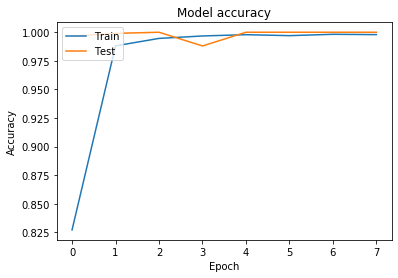

In [25]:
# Plot training & validation accuracy values
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

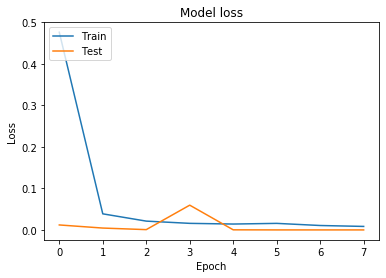

In [26]:
# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [28]:
# evaluate and print test accuracy
score = model.evaluate(X_test[:,:,0:2], y_test, verbose=0)
print('\n', 'CNN Test accuracy:', score[1])


 CNN Test accuracy: 1.0


In [29]:
# evaluate and print train accuracy
score = model.evaluate(X_train[:,:,0:2], y_train, verbose=0)
print('\n', 'CNN train accuracy:', score[1])


 CNN train accuracy: 1.0


In [30]:
# evaluate and print validation accuracy
score = model.evaluate(X_valid[:,:,0:2], y_valid, verbose=0)
print('\n', 'CNN validation accuracy:', score[1])


 CNN validation accuracy: 1.0


**Dense Layer**

In [39]:
# get filters name and shape
for layer in model.layers:
  # check for dense layer
  if 'DenseLayer' not in layer.name:
    continue
  # get filter weights
  filters, biases = layer.get_weights()
  print(layer.name, filters.shape)

DenseLayer (128, 50)


In [0]:
# Use Dense Layer named "VisualizationLayer"
from tensorflow.keras.models import Model
intermediate_layer_model = Model(inputs= model.input, 
                                 outputs= model.get_layer('DenseLayer').output)

In [0]:
embeddings = []
for i in X_test:
  i = np.expand_dims(i, axis=0)
  pred = intermediate_layer_model.predict(i)
  pred = pred.flatten()
  embeddings.append(pred)

In [34]:
embeddings[0].shape

(50,)

In [0]:
from sklearn.manifold import TSNE
sklearn_embedded = TSNE(n_components=2).fit_transform(embeddings)

In [0]:
color_intermediates = []
for i in range(len(X_test)):
  output_class = np.argmax(y_test[i,:])
  if(output_class == 0):
    color_intermediates.append("#0000ff")
  elif(output_class == 1):
    color_intermediates.append("#ff0000")
  elif(output_class == 2):
    color_intermediates.append("#00ff00")
  elif(output_class == 3):
    color_intermediates.append("#ffff00")
  elif(output_class == 4):
    color_intermediates.append("#008000")
  elif(output_class == 5):
    color_intermediates.append("#ff00ff")
  elif(output_class == 6):
    color_intermediates.append("#800080")
  elif(output_class == 7):
    color_intermediates.append("#008080")
  elif(output_class == 8):
    color_intermediates.append("#000080")
  else:
    color_intermediates.append("#ff0000")

In [37]:
len(color_intermediates)

750

Text(0.5, 1.0, 'Feature Visualization for Dense Layer')

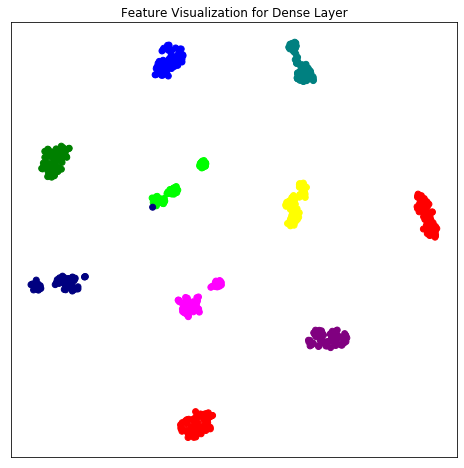

In [40]:
fig, ax = plt.subplots(1, figsize= (8, 8))
plt.scatter(x = sklearn_embedded[:,0], y=sklearn_embedded[:,1], color= color_intermediates, cmap='rainbow')
plt.setp(ax, xticks= [], yticks= [])
plt.title("Feature Visualization for Dense Layer")

**ConvLayer5**

In [71]:
# get filters name and shape
for layer in model.layers:
  # check for dense layer
  if 'ConvLayer5' not in layer.name:
    continue
  # get filter weights
  filters, biases = layer.get_weights()
  print(layer.name, filters.shape)

ConvLayer5 (3, 32, 32)


In [0]:
# Use Dense Layer named "ConvLayer5"
from tensorflow.keras.models import Model
intermediate_layer_model = Model(inputs= model.input, 
                                 outputs= model.get_layer('ConvLayer5').output)

In [0]:
embeddings = []
for i in X_test:
  i = np.expand_dims(i, axis=0)
  pred = intermediate_layer_model.predict(i)
  pred = pred.flatten()
  embeddings.append(pred)

In [74]:
embeddings[0].shape

(256,)

In [0]:
from sklearn.manifold import TSNE
sklearn_embedded = TSNE(n_components=2).fit_transform(embeddings)

In [76]:
sklearn_embedded.shape

(750, 2)

Text(0.5, 1.0, 'Feature Visualization for Conv layer 5')

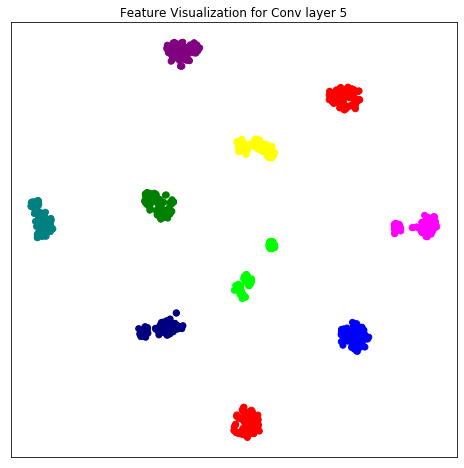

In [77]:
fig, ax = plt.subplots(1, figsize= (8, 8))
plt.scatter(x = sklearn_embedded[:,0], y=sklearn_embedded[:,1], color= color_intermediates, cmap='rainbow')
plt.setp(ax, xticks= [], yticks= [])
plt.title("Feature Visualization for Conv layer 5")

**ConvLayer4**

In [41]:
# get filters name and shape
for layer in model.layers:
  # check for dense layer
  if 'ConvLayer4' not in layer.name:
    continue
  # get filter weights
  filters, biases = layer.get_weights()
  print(layer.name, filters.shape)

ConvLayer4 (3, 32, 32)


In [0]:
# Use Dense Layer named "ConvLayer4"
from tensorflow.keras.models import Model
intermediate_layer_model = Model(inputs= model.input, 
                                 outputs= model.get_layer('ConvLayer4').output)

In [0]:
embeddings = []
for i in X_test:
  i = np.expand_dims(i, axis=0)
  pred = intermediate_layer_model.predict(i)
  pred = pred.flatten()
  embeddings.append(pred)

In [44]:
embeddings[0].shape

(512,)

In [0]:
from sklearn.manifold import TSNE
sklearn_embedded = TSNE(n_components=2).fit_transform(embeddings)

In [46]:
sklearn_embedded.shape

(750, 2)

Text(0.5, 1.0, 'Feature Visualization for Conv layer 4')

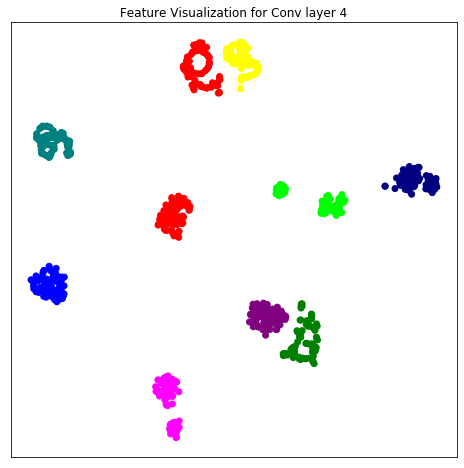

In [48]:
fig, ax = plt.subplots(1, figsize= (8, 8))
plt.scatter(x = sklearn_embedded[:,0], y=sklearn_embedded[:,1], color= color_intermediates, cmap='rainbow')
plt.setp(ax, xticks= [], yticks= [])
plt.title("Feature Visualization for Conv layer 4")

**ConvLayer3**

In [49]:
# get filters name and shape
for layer in model.layers:
  # check for dense layer
  if 'ConvLayer3' not in layer.name:
    continue
  # get filter weights
  filters, biases = layer.get_weights()
  print(layer.name, filters.shape)

ConvLayer3 (3, 16, 32)


In [0]:
# Use Dense Layer named "ConvLayer3"
from tensorflow.keras.models import Model
intermediate_layer_model = Model(inputs= model.input, 
                                 outputs= model.get_layer('ConvLayer3').output)

In [0]:
embeddings = []
for i in X_test:
  i = np.expand_dims(i, axis=0)
  pred = intermediate_layer_model.predict(i)
  pred = pred.flatten()
  embeddings.append(pred)

In [52]:
embeddings[0].shape

(1024,)

In [0]:
from sklearn.manifold import TSNE
sklearn_embedded = TSNE(n_components=2).fit_transform(embeddings)

In [54]:
sklearn_embedded.shape

(750, 2)

Text(0.5, 1.0, 'Feature Visualization for Conv layer 3')

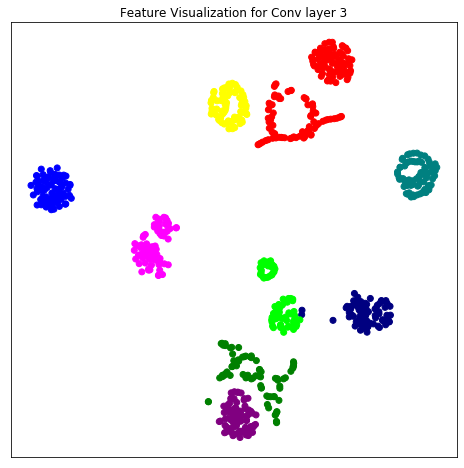

In [55]:
fig, ax = plt.subplots(1, figsize= (8, 8))
plt.scatter(x = sklearn_embedded[:,0], y=sklearn_embedded[:,1], color= color_intermediates, cmap='rainbow')
plt.setp(ax, xticks= [], yticks= [])
plt.title("Feature Visualization for Conv layer 3")

**ConvLayer2**

In [56]:
# get filters name and shape
for layer in model.layers:
  # check for dense layer
  if 'ConvLayer2' not in layer.name:
    continue
  # get filter weights
  filters, biases = layer.get_weights()
  print(layer.name, filters.shape)

ConvLayer2 (3, 256, 16)


In [0]:
# Use Dense Layer named "ConvLayer2"
from tensorflow.keras.models import Model
intermediate_layer_model = Model(inputs= model.input, 
                                 outputs= model.get_layer('ConvLayer2').output)

In [0]:
embeddings = []
for i in X_test:
  i = np.expand_dims(i, axis=0)
  pred = intermediate_layer_model.predict(i)
  pred = pred.flatten()
  embeddings.append(pred)

In [60]:
embeddings[0].shape

(1024,)

In [0]:
from sklearn.manifold import TSNE
sklearn_embedded = TSNE(n_components=2).fit_transform(embeddings)

In [62]:
sklearn_embedded.shape

(750, 2)

Text(0.5, 1.0, 'Feature Visualization for Conv layer 3')

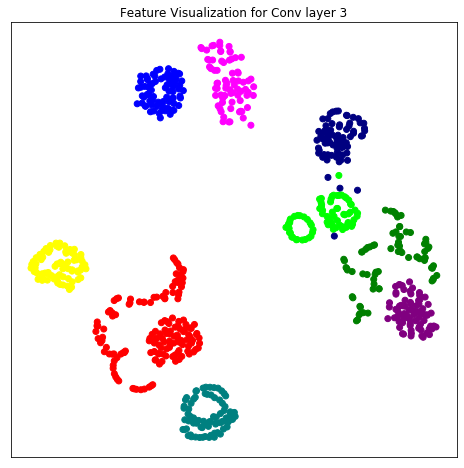

In [63]:
fig, ax = plt.subplots(1, figsize= (8, 8))
plt.scatter(x = sklearn_embedded[:,0], y=sklearn_embedded[:,1], color= color_intermediates, cmap='rainbow')
plt.setp(ax, xticks= [], yticks= [])
plt.title("Feature Visualization for Conv layer 2")

**ConvLayer1**

In [64]:
# get filters name and shape
for layer in model.layers:
  # check for dense layer
  if 'ConvLayer1' not in layer.name:
    continue
  # get filter weights
  filters, biases = layer.get_weights()
  print(layer.name, filters.shape)

ConvLayer1 (64, 2, 256)


In [0]:
# Use Dense Layer named "ConvLayer1"
from tensorflow.keras.models import Model
intermediate_layer_model = Model(inputs= model.input, 
                                 outputs= model.get_layer('ConvLayer1').output)

In [0]:
embeddings = []
for i in X_test:
  i = np.expand_dims(i, axis=0)
  pred = intermediate_layer_model.predict(i)
  pred = pred.flatten()
  embeddings.append(pred)

In [67]:
embeddings[0].shape

(32768,)

In [0]:
from sklearn.manifold import TSNE
sklearn_embedded = TSNE(n_components=2).fit_transform(embeddings)

In [69]:
sklearn_embedded.shape

(750, 2)

Text(0.5, 1.0, 'Feature Visualization for Conv layer 1')

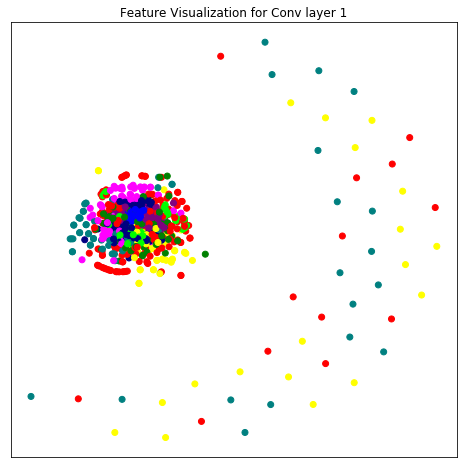

In [70]:
fig, ax = plt.subplots(1, figsize= (8, 8))
plt.scatter(x = sklearn_embedded[:,0], y=sklearn_embedded[:,1], color= color_intermediates, cmap='rainbow')
plt.setp(ax, xticks= [], yticks= [])
plt.title("Feature Visualization for Conv layer 1")

**RawSignal**